<a href="https://colab.research.google.com/github/Abhilash-Bee/DeepLearningCertification/blob/main/07_Milestone_Project_1_%F0%9F%8D%94%F0%9F%91%81_Food_Vision_Big%E2%84%A2_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🛠 07. Milestone Project 1: 🍔👁 Food Vision Big™ Exercises**

**Note:** The chief exercise for Milestone Project 1 is to finish the "TODO" sections in the [Milestone Project 1 Template notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/TEMPLATE_07_food_vision_milestone_project_1.ipynb). After doing so, move onto the following.


---

---

## **Importing dependencies**

In [ ]:
!wget https://raw.githubusercontent.com/Abhilash-Bee/DeepLearningCertification/main/extras/helper_function.py

--2024-02-08 11:39:04--  https://raw.githubusercontent.com/Abhilash-Bee/DeepLearningCertification/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460 (7.3K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   7.29K  --.-KB/s    in 0s      

2024-02-08 11:39:04 (50.2 MB/s) - ‘helper_function.py’ saved [7460/7460]



In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds

from helper_function import *

## **0. Doing the things which has done on video**

In [ ]:
dataset_list = tfds.list_builders()
dataset_list[:10]

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence']

In [ ]:
'food101' in dataset_list

True

### Getting the dataset 'Food101' full

In [ ]:
(train_data, test_data), df_info = tfds.load(name='food101',
                                             data_dir='/content/drive/MyDrive/Colab Notebooks/Food101',
                                             split=['train', 'validation'],
                                             batch_size=32,
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True,
                                             download=False)

In [ ]:
(test_data_unshuffled), df_info_unshuffled = tfds.load(name='food101',
                                                       data_dir='/content/drive/MyDrive/Colab Notebooks/Food101',
                                                       split='validation',
                                                       batch_size=32,
                                                       shuffle_files=False,
                                                       as_supervised=True,
                                                       with_info=True,
                                                       download=False)

### Visualizing the dataset

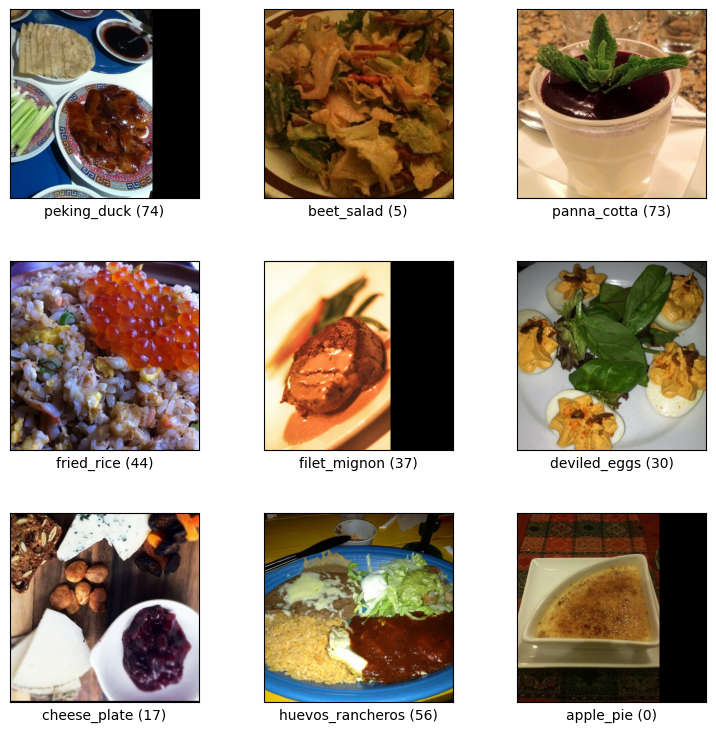

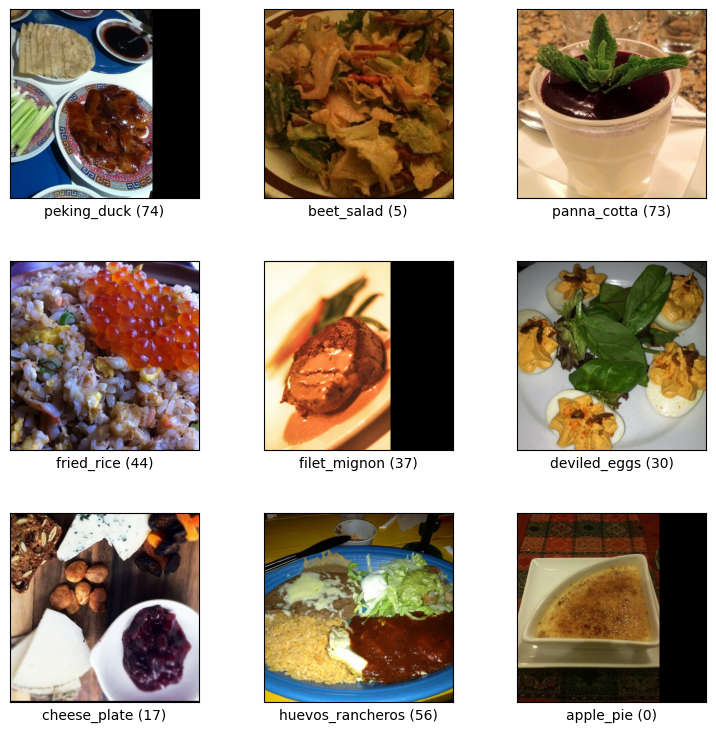

In [ ]:
tfds.show_examples(train_data, df_info, is_batched=True)

### Data Preprocessing

In [ ]:
df_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
df_info_unshuffled.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
class_names = df_info.features['label'].names

class_names[:10], len(class_names)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito'],
 101)

In [ ]:
len(train_data), len(test_data), len(test_data_unshuffled)

(2368, 790, 790)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
one_sample = train_data.take(1)

one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
for image, label in one_sample:
  print(image.shape, label.shape)

(32, 512, 512, 3) (32,)


In [ ]:
images = None
labels = None
for image, label in one_sample:
  images = image
  labels = label

image[0].numpy(), label[0].numpy()

(array([[[71, 60, 56],
         [70, 59, 55],
         [70, 59, 55],
         ...,
         [65, 60, 67],
         [65, 60, 67],
         [64, 59, 66]],
 
        [[62, 51, 47],
         [64, 53, 49],
         [66, 55, 51],
         ...,
         [65, 60, 67],
         [65, 60, 67],
         [64, 59, 66]],
 
        [[61, 50, 46],
         [65, 54, 50],
         [68, 57, 53],
         ...,
         [66, 61, 68],
         [65, 60, 67],
         [63, 58, 65]],
 
        ...,
 
        [[63, 64, 66],
         [64, 65, 67],
         [67, 67, 69],
         ...,
         [45, 42, 49],
         [45, 42, 49],
         [45, 42, 49]],
 
        [[64, 64, 66],
         [64, 64, 66],
         [65, 65, 67],
         ...,
         [44, 41, 48],
         [44, 41, 48],
         [44, 41, 48]],
 
        [[62, 62, 64],
         [62, 62, 64],
         [62, 62, 64],
         ...,
         [43, 40, 47],
         [42, 39, 46],
         [42, 39, 46]]], dtype=uint8),
 43)

In [ ]:
test_data_unshuffled

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
len(test_data_unshuffled)

790

In [ ]:
for image, label in test_data_unshuffled.take(1):
  imgs = image
  lbls = label

In [ ]:
imgs[0]

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 34,  76, 100],
        [ 30,  72,  96],
        [ 29,  70,  92],
        ...,
        [ 81, 101, 108],
        [ 77,  97, 104],
        [ 69,  89,  96]],

       [[ 35,  77, 101],
        [ 32,  74,  98],
        [ 32,  73,  95],
        ...,
        [ 75,  95, 102],
        [ 72,  92,  99],
        [ 68,  88,  95]],

       [[ 36,  78, 102],
        [ 34,  76, 100],
        [ 35,  75, 100],
        ...,
        [ 68,  88,  97],
        [ 68,  88,  95],
        [ 67,  87,  94]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   

### Creating image preprocessing function

In [ ]:
def image_preprocessing(image, label, IMG_SIZE=224):
    return tf.image.resize(image, [IMG_SIZE, IMG_SIZE]), label #(tf.one_hot(indices=label, depth=101))

In [ ]:
image, label = image_preprocessing(images[0], labels[0])

image, label

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[ 65.81122 ,  54.811222,  50.811222],
         [ 73.331635,  62.331635,  58.331635],
         [104.015305,  89.80102 ,  86.80102 ],
         ...,
         [ 61.85712 ,  59.071384,  65.64286 ],
         [ 65.      ,  60.      ,  67.      ],
         [ 64.64282 ,  59.642822,  66.64282 ]],
 
        [[ 67.28571 ,  56.285717,  52.285717],
         [ 66.47449 ,  55.47449 ,  51.47449 ],
         [ 67.73979 ,  53.525505,  50.525505],
         ...,
         [ 64.14284 ,  61.3571  ,  67.92857 ],
         [ 65.93368 ,  60.933674,  67.93368 ],
         [ 64.285645,  59.285645,  66.285645]],
 
        [[ 58.214287,  47.214287,  43.214287],
         [ 60.867348,  46.867348,  43.867348],
         [ 71.03062 ,  55.89286 ,  52.938778],
         ...,
         [ 62.999977,  60.382614,  66.61734 ],
         [ 65.05613 ,  60.056133,  66.84185 ],
         [ 64.36218 ,  59.362183,  66.147896]],
 
        ...,
 
        [[ 64.43876 ,  65.43876 

### Re-sizing all the images of our train and test dataset

In [ ]:
train_data = train_data.map(map_func=image_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)

test_data = test_data.map(map_func=image_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)

test_data_unshuffled = test_data_unshuffled.map(map_func=image_preprocessing, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
train_data, test_data, test_data_unshuffled

(<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
for image, label in train_data.take(1):
  imgs = image
  lbls = label

In [ ]:
imgs[8], lbls[8]

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[149.18367 , 136.82654 , 142.61224 ],
         [149.15817 , 140.15817 , 142.58673 ],
         [151.65306 , 148.29591 , 146.65306 ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],
 
        [[226.68878 , 217.4745  , 210.9745  ],
         [173.43367 , 166.36224 , 160.64796 ],
         [164.7449  , 160.15817 , 155.9745  ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],
 
        [[244.5     , 249.61734 , 235.57143 ],
         [180.95917 , 183.84692 , 173.01529 ],
         [144.18877 , 143.18877 , 138.06631 ],
         ...,
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      ]],
 
        ...,
 
        [[ 82.51528 ,  74.086754

### Plot random images from dataset

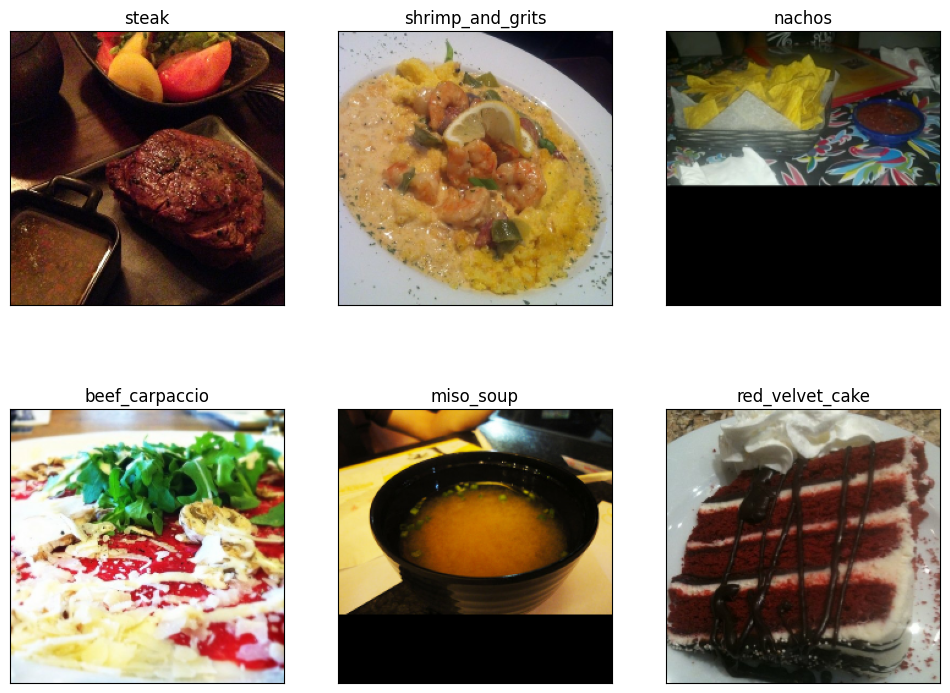

In [ ]:
plot_images_with_or_without_prediction(train_data, class_names)

### Activating 'Mixed Precision'

In [ ]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')

print(mixed_precision.global_policy())

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


<Policy "mixed_float16">


### Creating the model and compiling it

In [ ]:
IMG_SHAPE = (224, 224, 3)

# Creating the base model
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

# Creating the model
inputs = tf.keras.layers.Input(shape=IMG_SHAPE, name='Input layer')

x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(101)(x)

outputs = tf.keras.layers.Activation('softmax', dtype=tf.float32, name='Softmax_float32')(x)

model = tf.keras.Model(inputs, outputs)


16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 Softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

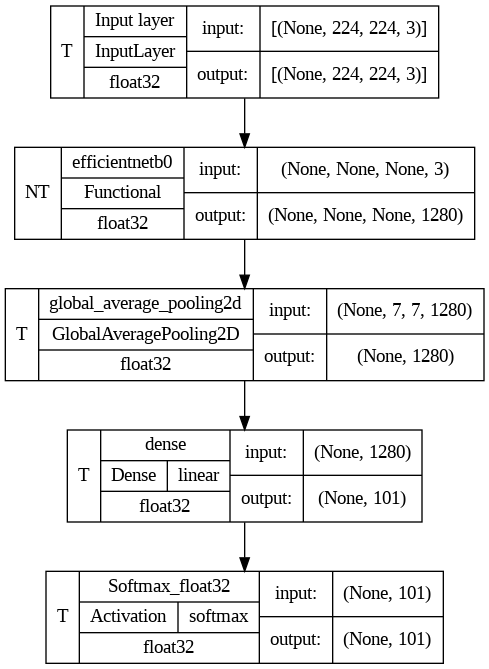

In [ ]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_trainable=True, show_shapes=True, show_dtype=True)

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

Input layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
Softmax_float32 True float32 <Policy "float32">


In [ ]:
for layer in model.layers[1].layers[:10]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

print('...')

for layer in model.layers[1].layers[-10:]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
...
block7a_se_squeeze False float32 <Policy "mixed_float16">
block7a_se_reshape False float32 <Policy "mixed_float16">
block7a_se_reduce False float32 <Policy "mixed_float16">
block7a_se_expand False float32 <Policy "mixed_float16">
block7a_se_excite False float32 <Policy "mixed_float16">
block7a_project_conv False float32 <Policy "mixed_float16">
block7a_project_bn False float32 <Policy "mixed_float16">
top_conv False float32 <Policy "mixed_float16">
top_bn False float32 <Policy "mixed_float

### Fit the model

In [ ]:
history_0 = model.fit(train_data,
                      epochs=3,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=0.15 * len(test_data),
                      callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                       experiment_name='feature_extraction'),
                                 tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                            experiment_name='feature_extraction')])

Saving the tensorboard callbacks in Tensorboard/feature_extraction/20240208-060210
Path of the checkpoint: ModelCheckpoint/feature_extraction/20240208-060210
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7664 - accuracy: 0.5698
Epoch 1: saving model to ModelCheckpoint/feature_extraction/20240208-060210
2368/2368 [==============================] - 267s 97ms/step - loss: 1.7664 - accuracy: 0.5698 - val_loss: 1.1925 - val_accuracy: 0.6773
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2490 - accuracy: 0.6772
Epoch 2: saving model to ModelCheckpoint/feature_extraction/20240208-060210
2368/2368 [==============================] - 193s 81ms/step - loss: 1.2491 - accuracy: 0.6772 - val_loss: 1.0914 - val_accuracy: 0.6993
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.1018 - accuracy: 0.7124
Epoch 3: saving model to ModelCheckpoint/feature_extraction/20240208-060210
2368/2368 [==============================] - 203s 8

### Evaluate the model

In [ ]:
feature_extraction_evaluation = model.evaluate(test_data)

790/790 [==============================] - 60s 75ms/step - loss: 1.0564 - accuracy: 0.7132


### Fit the model for further 2 more epochs

In [ ]:
history_1 = model.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=0.15 * len(test_data),
                      initial_epoch=history_0.epoch[-1],
                      callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                       experiment_name='feature_extraction_further'),
                                 tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                            experiment_name='feature_extraction_further')])

Saving the tensorboard callbacks in Tensorboard/feature_extraction_further/20240208-061602
Path of the checkpoint: ModelCheckpoint/feature_extraction_further/20240208-061602
Epoch 3/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.0056 - accuracy: 0.7356
Epoch 3: saving model to ModelCheckpoint/feature_extraction_further/20240208-061602
2368/2368 [==============================] - 178s 75ms/step - loss: 1.0056 - accuracy: 0.7356 - val_loss: 1.0533 - val_accuracy: 0.7096
Epoch 4/5
2367/2368 [============================>.] - ETA: 0s - loss: 0.9350 - accuracy: 0.7530
Epoch 4: saving model to ModelCheckpoint/feature_extraction_further/20240208-061602
2368/2368 [==============================] - 192s 81ms/step - loss: 0.9351 - accuracy: 0.7530 - val_loss: 1.0345 - val_accuracy: 0.7190
Epoch 5/5
2367/2368 [============================>.] - ETA: 0s - loss: 0.8789 - accuracy: 0.7668
Epoch 5: saving model to ModelCheckpoint/feature_extraction_further/20240208-061602
2368/2368 [

### Evaluate the model

In [ ]:
feature_extraction_further_evaluation = model.evaluate(test_data)

790/790 [==============================] - 53s 67ms/step - loss: 1.0435 - accuracy: 0.7170


### ModelCheckpoint Path

In [ ]:
modelcheckpoint_path_1 = 'ModelCheckpoint/feature_extraction/20240208-060210'
modelcheckpoint_path_2 = 'ModelCheckpoint/feature_extraction_further/20240208-061602'

### Plot the loss and accuracy curve

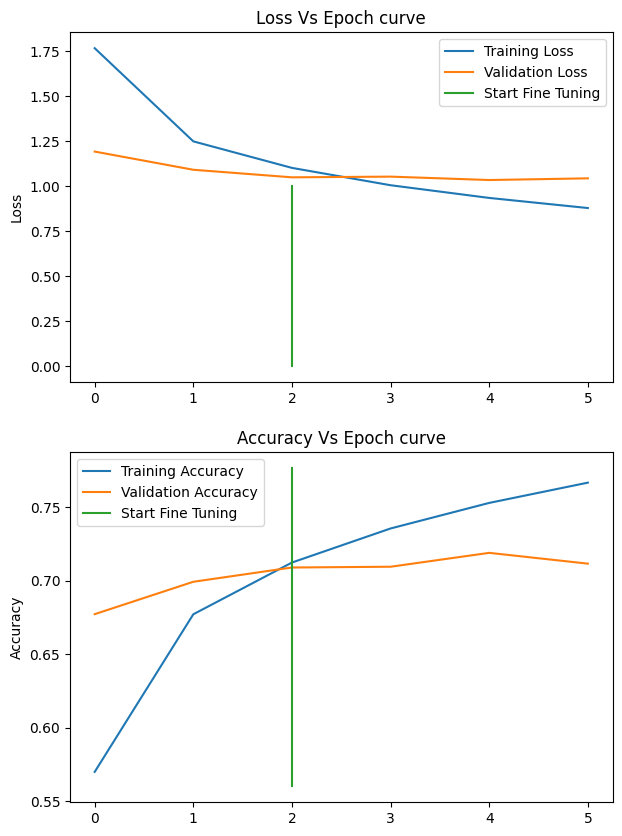

In [ ]:
compare_histories(history_0, history_1)

## Fine Tuning

In [ ]:
base_model.trainable = True

In [ ]:
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [ ]:
for layer in base_model.layers[-25:-15]:
  print(layer.name, layer.trainable, layer.dtype_policy)

block6d_se_squeeze False <Policy "mixed_float16">
block6d_se_reshape False <Policy "mixed_float16">
block6d_se_reduce False <Policy "mixed_float16">
block6d_se_expand False <Policy "mixed_float16">
block6d_se_excite False <Policy "mixed_float16">
block6d_project_conv True <Policy "mixed_float16">
block6d_project_bn True <Policy "mixed_float16">
block6d_drop True <Policy "mixed_float16">
block6d_add True <Policy "mixed_float16">
block7a_expand_conv True <Policy "mixed_float16">


In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

Input layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
Softmax_float32 True float32 <Policy "float32">


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

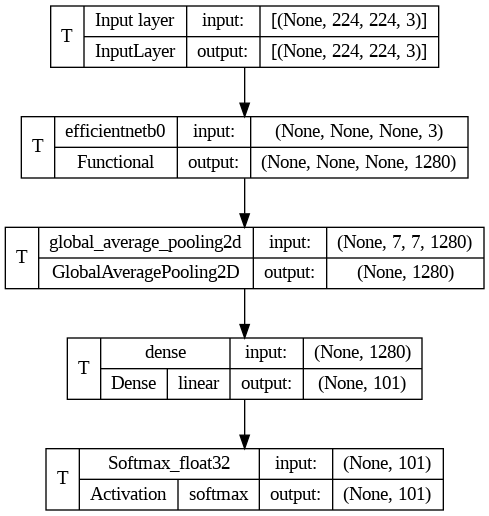

In [ ]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_trainable=True, show_shapes=True)

In [ ]:
!rm -rf /content/Tensorboard/Fine_Tuning_1

In [ ]:
# Fit the model
history_2 = model.fit(train_data,
                      epochs=8,
                      validation_data=test_data,
                      validation_steps=0.15 * len(test_data),
                      initial_epoch=history_1.epoch[-1],
                      callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                       experiment_name='Fine_Tuning_1'),
                                 tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                            experiment_name='Fine_Tuning_1',
                                                            sbo=True)])

Saving the tensorboard callbacks in Tensorboard/Fine_Tuning_1/20240208-075841
Path of the checkpoint: ModelCheckpoint/Fine_Tuning_1/20240208-075841
Epoch 5/8
2367/2368 [============================>.] - ETA: 0s - loss: 0.7607 - accuracy: 0.7943
Epoch 5: val_loss improved from inf to 0.98532, saving model to ModelCheckpoint/Fine_Tuning_1/20240208-075841
2368/2368 [==============================] - 207s 82ms/step - loss: 0.7607 - accuracy: 0.7943 - val_loss: 0.9853 - val_accuracy: 0.7348
Epoch 6/8
2367/2368 [============================>.] - ETA: 0s - loss: 0.5654 - accuracy: 0.8484
Epoch 6: val_loss did not improve from 0.98532
2368/2368 [==============================] - 199s 84ms/step - loss: 0.5655 - accuracy: 0.8484 - val_loss: 0.9993 - val_accuracy: 0.7374
Epoch 7/8
2367/2368 [============================>.] - ETA: 0s - loss: 0.4204 - accuracy: 0.8903
Epoch 7: val_loss did not improve from 0.98532
2368/2368 [==============================] - 187s 79ms/step - loss: 0.4204 - accuracy

In [ ]:
# Evaluate the model
fine_tuned_1_evaluation = model.evaluate(test_data)

790/790 [==============================] - 54s 69ms/step - loss: 1.1699 - accuracy: 0.7302


### Save the model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Foodalldata73.keras')

### Load the saved model

In [ ]:
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Foodalldata73.keras')

In [ ]:
saved_model.evaluate(test_data)

790/790 [==============================] - 59s 71ms/step - loss: 1.1699 - accuracy: 0.7302


[1.169941782951355, 0.7301782369613647]

### Load previous model weights

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.load_weights('ModelCheckpoint/Fine_Tuning_1/20240208-075841')

In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 57s 68ms/step - loss: 0.9875 - accuracy: 0.7350


[0.9875123500823975, 0.7349702715873718]

### Save the model weights

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Foodalldata73_5')

### Load the saved model weights

In [ ]:
IMG_SHAPE = (224, 224, 3)

# Creating the base model
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

# Creating the model
inputs = tf.keras.layers.Input(shape=IMG_SHAPE, name='Input layer')

x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(101)(x)

outputs = tf.keras.layers.Activation('softmax', dtype=tf.float32, name='Softmax_float32')(x)

saved_model = tf.keras.Model(inputs, outputs)


In [ ]:
saved_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])

In [ ]:
saved_model.load_weights('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/Foodalldata73_5')

In [ ]:
saved_model.evaluate(test_data)

  1/790 [..............................] - ETA: 7:47:07 - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: 

---

---

## **1. Use the same evaluation techniques on the large-scale Food Vision model as you did in the previous notebook ([Transfer Learning Part 3: Scaling up](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/06_transfer_learning_in_tensorflow_part_3_scaling_up.ipynb)). More specifically, it would be good to see:**

In [ ]:
saved_model.evaluate(test_data_unshuffled)


### A confusion matrix between all of the model's predictions and true labels.


### A graph showing the f1-scores of each class.



### A visualization of the model making predictions on various images and comparing the predictions to the ground truth.
  * For example, plot a sample image from the test dataset and have the title of the plot show the prediction, the prediction probability and the ground truth label.
  
  > **Note:** To compare predicted labels to test labels, it might be a good idea when loading the test data to set `shuffle=False` (so the ordering of test data is preserved alongside the order of predicted labels).



## **2. Take 3 of your own photos of food and use the Food Vision model to make predictions on them. How does it go? Share your images/predictions with the other students.**


## **3. Retrain the model (feature extraction and fine-tuning) we trained in this notebook, except this time use [`EfficientNetB4`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB4) as the base model instead of `EfficientNetB0`. Do you notice an improvement in performance? Does it take longer to train? Are there any tradeoffs to consider?**


## **4. Name one important benefit of mixed precision training, how does this benefit take place?**

---

---


### 📖 07. Milestone Project 1: 🍔👁 Food Vision Big™ Extra-curriculum

* Read up on learning rate scheduling and the [learning rate scheduler callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler). What is it? And how might it be helpful to this project?
* Read up on TensorFlow data loaders ([improving TensorFlow data loading performance](https://www.tensorflow.org/guide/data_performance)). Is there anything we've missed? What methods you keep in mind whenever loading data in TensorFlow? Hint: check the summary at the bottom of the page for a great round up of ideas.
* Read up on the documentation for [TensorFlow mixed precision training](https://www.tensorflow.org/guide/mixed_precision). What are the important things to keep in mind when using mixed precision training?